# 데이터 크롤링
데이터 크롤링은 웹 사이트에서 자동으로 데이터를 수집하는 과정을 말합니다.

## 데이터 크롤링 과정
1. 시작 URL 설정: 크롤링을 시작할 웹 페이지의 URL을 정합니다.
2. 웹 페이지 요청 및 다운로드: 설정된 URL로 HTTP 요청을 보내 해당 페이지의 내용을 다운로드합니다.
3. 데이터 파싱: 다운로드된 웹 페이지의 HTML 코드를 분석하여 필요한 데이터를 추출합니다. 이 과정에서 HTML 태그를 기반으로 데이터를 식별하고 추출하는 작업이 이루어집니다.
5. 데이터 저장: 추출된 데이터를 데이터베이스, CSV 파일, 또는 다른 형태로 저장합니다.
6. 링크 추출 및 순회: 현재 페이지에서 다른 페이지로의 링크를 추출하고, 이 링크들을 따라가면서 위의 과정을 반복합니다.

## 데이터 크롤링 주의사항
* 저작권과 사용 약관 준수: 크롤링 대상 웹사이트의 저작권과 robots.txt 파일, 사용 약관을 확인하여 규정을 준수해야 합니다.
* 서버 부하 관리: 너무 빠른 속도로 크롤링하면 웹사이트의 서버에 과부하를 줄 수 있으므로 적절한 시간 간격을 두고 요청을 보내야 합니다.
* 데이터 처리와 보안: 수집한 데이터를 안전하게 처리하고 저장해야 합니다. 또한 개인정보 보호법 등 데이터 보호 관련 법률을 준수해야 합니다.

## 파이썬에서 데이터 크롤링하기
파이썬은 데이터 크롤링을 위한 다양한 라이브러리를 제공합니다. 대표적으로 requests 라이브러리로 웹 페이지를 요청하고, BeautifulSoup 또는 lxml을 사용하여 HTML을 파싱할 수 있습니다.

### 1. requests
requests 라이브러리는 파이썬에서 HTTP 요청을 보내기 위해 사용되는 매우 인기 있는 라이브러리입니다. requests는 사용하기 쉬운 API를 제공하며, HTTP 요청을 보내고 받는 과정을 단순화시켜 줍니다.

In [1]:
# Python 으로 HTML 을 다루는 라이브러리
from bs4 import BeautifulSoup

# Pandas : 엑셀화
import pandas as pd

# 페이지 요청하는 라이브러리 
import requests

# 시간 (천천히) 라이브러리 + 랜덤 라이브러리: 넘 빠르고 규칙적이면 범인 같아보여서 ㅋㅋㅋ 
import time
import random

#### 1-1. status_code
HTTP 상태 코드를 나타냅니다. 200은 성공, 404는 페이지를 찾을 수 없음, 500은 서버 에러 등을 의미합니다.   
- 200 : 가져오는 데 충돌이나 문제가 없었다
- 400번 대 : 존재하지 않는 페이지
- 500번 대 : 비공개나 로그인을 해야 볼 수 있는 페이지와 같이 제한이 걸린 페이지

로또 복권 당첨번호 페이지 요청하기

In [2]:
url = requests.get("https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C")

In [3]:
url

<Response [200]>

#### 1-2. text
응답 본문을 유니코드 형태로 제공합니다. HTML, JSON, XML 등의 텍스트 데이터를 포함할 수 있습니다.

* 로또 복권 페이지 정보 확인하기

In [4]:
url.text

'<!doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ko">\n<head profile="http://a9.com/-/spec/opensearch/1.1/">\n<meta http-equiv="content-Type" content="text/html;charset=utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta name="autocomplete" content="off" />\n<meta name="referrer" content="always">\n<meta name="format-detection" content="telephone=no" />\n<meta property="og:title" content="연금복권 &ndash; Daum 검색" />\n<meta property="og:url" content="https://search.daum.net/search?w=tot&amp;q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C" />\n<meta property="og:description" content="Daum 검색에서 연금복권에 대한 최신정보를 찾아보세요." />\n<meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" />\n<meta property="og:site_name" content="다음검색" />\n<title>연금복권 &ndash; Daum 검색</title>\n<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" title="Daum">\n<link rel="stylesheet" type="text

In [5]:
html = BeautifulSoup(url.text)
html

<!DOCTYPE html>
<html lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head profile="http://a9.com/-/spec/opensearch/1.1/">
<meta content="text/html;charset=utf-8" http-equiv="content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="off" name="autocomplete"/>
<meta content="always" name="referrer"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="연금복권 – Daum 검색" property="og:title"/>
<meta content="https://search.daum.net/search?w=tot&amp;q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C" property="og:url"/>
<meta content="Daum 검색에서 연금복권에 대한 최신정보를 찾아보세요." property="og:description"/>
<meta content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" property="og:image"/>
<meta content="다음검색" property="og:site_name"/>
<title>연금복권 – Daum 검색</title>
<link href="//search.daum.net/OpenSearch.xml" rel="search" title="Daum" type="application/opensearchdescription+xml"/>
<link charset="utf-8" href="//search1.daumcdn.net/search/statics/com

#### 1-3. robots.txt
robots.txt 파일은 웹사이트가 웹 크롤러(또는 로봇)에게 자신의 사이트를 어떻게 크롤링해야 하는지를 알려주는 표준입니다. 이 파일은 주로 검색 엔진의 웹 크롤러가 사이트의 어느 부분을 인덱싱하거나 크롤링해야 하는지, 또는 하지 말아야 하는지를 지정하는 데 사용됩니다.

* User-agent: 크롤러의 이름을 지정합니다. ```*```는 모든 크롤러에게 적용됨을 의미합니다.
* Disallow: 크롤러가 접근을 금지하는 경로를 지정합니다. 위 예시에서는 /private/과 /tmp/ 디렉토리에 대한 접근을 금지합니다.
* Allow: Disallow로 금지된 경로 중에서도 접근을 허용하는 예외를 지정합니다. (모든 로봇이 이 지시어를 지원하는 것은 아닙니다.)
* Sitemap: 사이트맵 파일의 URL을 지정합니다. 사이트맵은 웹사이트의 모든 URL을 포함하는 파일로, 검색 엔진이 사이트의 구조를 더 잘 이해하는 데 도움을 줍니다.

In [6]:
# 크롤링이 가능한지 확인하는 것이 robots.txt

a = requests.get("https://www.naver.com/robots.txt").text
print(a)

# 모든이들에게 허용이 되지만, 가능한 것이 하나도 없다!

User-agent: *
Disallow: /
Allow : /$ 



In [7]:
a = requests.get("https://finance.naver.com/robots.txt").text
print(a)

# 모든이들에게 허용되고, 다 안된다
# 하지만, yeti는 가능 (네이버가 만든 크롤링 프로그램)
# 예티는 allow 부분들은 되지만, disallow 는 안된다!

User-agent: *
Disallow: /
User-agent: yeti
Disallow: /
Allow: /sise/
Allow: /research/
Allow: /marketindex/
Allow: /fund/
Allow: /template/head_js.naver
Disallow : /fund/news/
Disallow : /marketindex/news/



### 2. BeautifulSoup
파이썬을 사용하여 웹 페이지를 긁어오는(스크래핑) 작업을 쉽게 할 수 있게 해주는 라이브러리입니다. HTML과 XML 파일을 파싱하여 복잡한 정보에서 원하는 데이터를 쉽게 접근하고, 수정하며, 검색할 수 있도록 도와줍니다. 이 라이브러리는 매우 직관적인 방법으로 문서를 탐색할 수 있는 다양한 메서드와 속성을 제공합니다.

#### 2-1. BeautifulSoup 객체 변환
먼저, requests를 사용하여 웹 페이지의 내용을 가져온 후, BeautifulSoup 객체를 생성합니다. 이 객체를 통해 웹 페이지의 구조를 탐색하고 원하는 정보를 추출할 수 있습니다.

In [8]:
url = requests.get("https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C")
html = BeautifulSoup(url.text)
html

<!DOCTYPE html>
<html lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head profile="http://a9.com/-/spec/opensearch/1.1/">
<meta content="text/html;charset=utf-8" http-equiv="content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="off" name="autocomplete"/>
<meta content="always" name="referrer"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="연금복권 – Daum 검색" property="og:title"/>
<meta content="https://search.daum.net/search?w=tot&amp;q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C" property="og:url"/>
<meta content="Daum 검색에서 연금복권에 대한 최신정보를 찾아보세요." property="og:description"/>
<meta content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" property="og:image"/>
<meta content="다음검색" property="og:site_name"/>
<title>연금복권 – Daum 검색</title>
<link href="//search.daum.net/OpenSearch.xml" rel="search" title="Daum" type="application/opensearchdescription+xml"/>
<link charset="utf-8" href="//search1.daumcdn.net/search/statics/com

#### 2-2. parser
* html.parser : BeautifulSoup의 기본값이며 추가 설치 없이 사용할 수 있으며, 대부분의 경우 적절한 성능과 호환성을 제공합니다. 
* lxml : 매우 빠른 파싱 속도를 자랑하는 외부 라이브러리입니다. XML과 HTML 모두를 위한 파서를 제공합니다.
* html5lib : HTML5를 파싱하는 데 특화된 외부 라이브러리입니다. 웹 브라우저가 HTML5 문서를 파싱하는 방식을 모방하여, 매우 복잡하고 잘못 형성된 HTML 문서도 잘 처리할 수 있습니다.


html.parser는 추가 설치 없이 사용할 수 있지만, 덜 복잡한 문서에 적합합니다. html5lib은 복잡한 HTML5 문서를 잘 처리하지만 속도가 느립니다.

```
html = BeautifulSoup(url.text, "html.parser")
html = BeautifulSoup(url.text, "lxml")
html = BeautifulSoup(url.text, "html5lib")
```

In [9]:
url = requests.get("https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C")
html = BeautifulSoup(url.text, 'lxml')
html

<!DOCTYPE html>
<html lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head profile="http://a9.com/-/spec/opensearch/1.1/">
<meta content="text/html;charset=utf-8" http-equiv="content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="off" name="autocomplete"/>
<meta content="always" name="referrer"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="연금복권 – Daum 검색" property="og:title"/>
<meta content="https://search.daum.net/search?w=tot&amp;q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C" property="og:url"/>
<meta content="Daum 검색에서 연금복권에 대한 최신정보를 찾아보세요." property="og:description"/>
<meta content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" property="og:image"/>
<meta content="다음검색" property="og:site_name"/>
<title>연금복권 – Daum 검색</title>
<link href="//search.daum.net/OpenSearch.xml" rel="search" title="Daum" type="application/opensearchdescription+xml"/>
<link charset="utf-8" href="//search1.daumcdn.net/search/statics/com

#### 2-3. find 함수
find 함수는 조건에 맞는 HTML 태그 중 첫 번째 태그만을 찾아서 반환합니다. 태그 이름, 속성 등을 인자로 사용하여 원하는 요소를 정확하게 지정할 수 있습니다.

In [11]:
# span이라는 클래스에 class f_red라는 속성을 가진 부분이 출력
html.find("span", attrs = {"class":'f_red'})

<span class="f_red">제199회</span>

In [17]:
html.find("td", attrs={'class':"each"})

<td class="each">4조</td>

#### 2-4. text
find 함수로 웹 페이지의 특정 요소를 찾고, 그 결과에 .text 속성을 사용하는 것은 해당 요소와 그 자식 요소들에 포함된 모든 텍스트를 추출하는 과정입니다. 

In [14]:
current = int(html.find("span", attrs = {"class":'f_red'}).text[1:-1])
current

199

#### 2-5. find_all 함수
find_all 함수는 조건에 맞는 모든 태그를 찾아 리스트 형태로 반환합니다. 이 함수를 사용하면 웹 페이지 내의 특정 태그가 여러 개 있을 때 모두 찾을 수 있습니다.

In [15]:
html.find("td", attrs = {'class':"number"})

<td class="number"> <div class="inner"> <span class="num">1</span> <span class="num">0</span> <span class="num">3</span> <span class="num">6</span> <span class="num">3</span> <span class="num">3</span> </div> </td>

In [22]:
number = html.find("td", attrs = {'class':"number"}).find_all("span")
box = []
for i in number:
    box.append(int(i.text))
    
box

[1, 0, 3, 6, 3, 3]

In [23]:
def make_number(html):
    number = html.find("td", attrs = {'class':"number"}).find_all("span")
    box = []
    for i in number:
        box.append(int(i.text))

    return box

In [24]:
total = []
for n in range(1,11):
    
    url = requests.get(f"https://search.daum.net/search?w=tot&DA=JIM&rtmaxcoll=JIM&&q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C%20720%2B%20{n}%ED%9A%8C%EC%B0%A8")
    html=BeautifulSoup(url.text)
    
    number = make_number(html)
    total.append(number)
    
    time.sleep(1 + random.random())
    print(f"{n}회 연금복권 데이터 저장완료 : {number}")

1회 연금복권 데이터 저장완료 : [1, 6, 2, 1, 3, 2]
2회 연금복권 데이터 저장완료 : [4, 5, 0, 5, 5, 8]
3회 연금복권 데이터 저장완료 : [5, 4, 4, 9, 5, 5]
4회 연금복권 데이터 저장완료 : [1, 2, 4, 4, 2, 0]
5회 연금복권 데이터 저장완료 : [7, 5, 4, 6, 5, 5]
6회 연금복권 데이터 저장완료 : [1, 9, 3, 2, 0, 2]
7회 연금복권 데이터 저장완료 : [5, 9, 7, 0, 9, 3]
8회 연금복권 데이터 저장완료 : [2, 3, 4, 0, 5, 8]
9회 연금복권 데이터 저장완료 : [1, 3, 3, 5, 1, 0]
10회 연금복권 데이터 저장완료 : [7, 7, 0, 1, 7, 3]


In [25]:
total

[[1, 6, 2, 1, 3, 2],
 [4, 5, 0, 5, 5, 8],
 [5, 4, 4, 9, 5, 5],
 [1, 2, 4, 4, 2, 0],
 [7, 5, 4, 6, 5, 5],
 [1, 9, 3, 2, 0, 2],
 [5, 9, 7, 0, 9, 3],
 [2, 3, 4, 0, 5, 8],
 [1, 3, 3, 5, 1, 0],
 [7, 7, 0, 1, 7, 3]]

In [29]:
result = pd.DataFrame(total, columns=['1번째','2번째','3번째','4번째','5번째','6번째'])
result.to_excel("생성 파일/lottary_result.xlsx")

In [33]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

import time
import random


def make_number(html):
    number = html.find("td", attrs = {'class':"number"}).find_all("span")
    box = []
    for i in number:
        box.append(int(i.text))

    return box

total = []
for n in range(1,11):
    
    url = requests.get(f"https://search.daum.net/search?w=tot&DA=JIM&rtmaxcoll=JIM&&q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C%20720%2B%20{n}%ED%9A%8C%EC%B0%A8")
    html=BeautifulSoup(url.text)
    
    reward = html.find("td", attrs={'class':"each"}).text[0]
    number = make_number(html)
    
    total.append([reward]+number)
    
    time.sleep(1 + random.random())
    print(f"{n}회 연금복권 데이터 저장 : {reward} , {number}")

1회 연금복권 데이터 저장 : 4 , [1, 6, 2, 1, 3, 2]
2회 연금복권 데이터 저장 : 2 , [4, 5, 0, 5, 5, 8]
3회 연금복권 데이터 저장 : 4 , [5, 4, 4, 9, 5, 5]
4회 연금복권 데이터 저장 : 4 , [1, 2, 4, 4, 2, 0]
5회 연금복권 데이터 저장 : 4 , [7, 5, 4, 6, 5, 5]
6회 연금복권 데이터 저장 : 5 , [1, 9, 3, 2, 0, 2]
7회 연금복권 데이터 저장 : 2 , [5, 9, 7, 0, 9, 3]
8회 연금복권 데이터 저장 : 4 , [2, 3, 4, 0, 5, 8]
9회 연금복권 데이터 저장 : 3 , [1, 3, 3, 5, 1, 0]
10회 연금복권 데이터 저장 : 2 , [7, 7, 0, 1, 7, 3]


In [35]:
result = pd.DataFrame(total, columns=['조','1번째','2번째','3번째','4번째','5번째','6번째'])
result.to_excel("생성 파일/lottary_result2.xlsx")
result

,조,1번째,2번째,3번째,4번째,5번째,6번째
0,4,1,6,2,1,3,2
1,2,4,5,0,5,5,8
2,4,5,4,4,9,5,5
3,4,1,2,4,4,2,0
4,4,7,5,4,6,5,5
5,5,1,9,3,2,0,2
6,2,5,9,7,0,9,3
7,4,2,3,4,0,5,8
8,3,1,3,3,5,1,0
9,2,7,7,0,1,7,3


In [40]:
def make_number2(html):
    number = html.find("tr", attrs={'class':'fst'}).text.split()[5:]
    number[0] = number[0][0]
    number = list(map(int, number))
    return number

total = []
for n in range(1, 11):
    url = requests.get(f"https://search.daum.net/search?w=tot&DA=JIM&rtmaxcoll=JIM&&q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C%20720%2B%20{n}%ED%9A%8C%EC%B0%A8")
    html = BeautifulSoup(url.text)
    number = make_number2(html)
    total.append(number)
    time.sleep(1 + random.random())
    
pd.DataFrame(total, columns=['조','1번째','2번째','3번째','4번째','5번째','6번째'])

,조,1번째,2번째,3번째,4번째,5번째,6번째
0,4,1,6,2,1,3,2
1,2,4,5,0,5,5,8
2,4,5,4,4,9,5,5
3,4,1,2,4,4,2,0
4,4,7,5,4,6,5,5
5,5,1,9,3,2,0,2
6,2,5,9,7,0,9,3
7,4,2,3,4,0,5,8
8,3,1,3,3,5,1,0
9,2,7,7,0,1,7,3


In [39]:
html.find("tr", attrs={'class':'fst'}).text.split()

['1등', '월', '700만원', 'x', '20년', '2조', '7', '7', '0', '1', '7', '3']

# 0227

In [1]:
from bs4 import BeautifulSoup
import requests
import random
import time
import pandas as pd

In [2]:
url = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page=1")
html = BeautifulSoup(url.text)

In [18]:
# attrs={"class":"pgRR"} 했었지만, class는 class_ 로 바로 찾을 수 있음!
kospi_page = int(html.find('td', class_ = "pgRR").find('a')['href'][-2:])
kospi_page

44

In [37]:
html.find('table', attrs={'class':"type_2"})
table = html.find('table', class_ ="type_2")
table

<table cellpadding="0" cellspacing="0" class="type_2" summary="코스피 시세정보를 선택한 항목에 따라 정보를 제공합니다.">
<caption>코스피</caption>
<colgroup>
<col width="2%"/>
<col width="*"/>
<col width="7%"/>
<col width="9%"/>
<col width="7%"/>
<col width="8%"/>
<col width="8%"/>
<col width="8%"/>
<col width="8%"/>
<col width="8%"/>
<col width="8%"/>
<col width="8%"/>
<col width="6%"/>
</colgroup>
<thead>
<tr>
<th scope="col">N</th>
<th scope="col">종목명</th>
<th scope="col">현재가</th>
<th class="tr" scope="col" style="padding-right:8px">전일비</th>
<th scope="col">등락률</th>
<th scope="col">액면가</th>
<th scope="col">시가총액</th>
<th scope="col">상장주식수</th>
<th scope="col">외국인비율</th>
<th scope="col">거래량</th>
<th scope="col">PER</th>
<th scope="col">ROE</th>
<th scope="col">토론실</th>
</tr>
</thead>
<tbody>
<tr><td class="blank_08" colspan="10"></td></tr>
<tr onmouseout="mouseOut(this)" onmouseover="mouseOver(this)">
<td class="no">1</td>
<td><a class="tltle" href="/item/main.naver?code=005930">삼성전자</a></td>
<td class="number"

In [38]:
pd.read_html(str(table))

[       N       종목명       현재가     전일비     등락률     액면가       시가총액      상장주식수  \
 0    NaN       NaN       NaN     NaN     NaN     NaN        NaN        NaN   
 1    1.0      삼성전자   73100.0   300.0  +0.41%   100.0  4363911.0  5969783.0   
 2    2.0    SK하이닉스  158400.0  3400.0  -2.10%  5000.0  1153156.0   728002.0   
 3    3.0  LG에너지솔루션  414500.0  5000.0  +1.22%   500.0   969930.0   234000.0   
 4    4.0  삼성바이오로직스  810000.0     0.0   0.00%  2500.0   576509.0    71174.0   
 ..   ...       ...       ...     ...     ...     ...        ...        ...   
 76  49.0  HD한국조선해양  111200.0   300.0  -0.27%  5000.0    78700.0    70773.0   
 77  50.0     한미반도체   79400.0  1700.0  +2.19%   100.0    77287.0    97339.0   
 78   NaN       NaN       NaN     NaN     NaN     NaN        NaN        NaN   
 79   NaN       NaN       NaN     NaN     NaN     NaN        NaN        NaN   
 80   NaN       NaN       NaN     NaN     NaN     NaN        NaN        NaN   
 
     외국인비율        거래량    PER    ROE  토론실  
 0     

In [39]:
table = pd.read_html(str(table))[0]
table

,N,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,토론실
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,삼성전자,73100.0,300.0,+0.41%,100.0,4363911.0,5969783.0,54.50,1840798.0,34.30,4.15,NaN
2,2.0,SK하이닉스,158400.0,3400.0,-2.10%,5000.0,1153156.0,728002.0,54.06,891238.0,-10.04,3.56,NaN
3,3.0,LG에너지솔루션,414500.0,5000.0,+1.22%,500.0,969930.0,234000.0,4.91,21679.0,63.75,5.75,NaN
4,4.0,삼성바이오로직스,810000.0,0.0,0.00%,2500.0,576509.0,71174.0,11.76,4923.0,61.53,11.42,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,49.0,HD한국조선해양,111200.0,300.0,-0.27%,5000.0,78700.0,70773.0,26.59,27092.0,52.33,-2.22,NaN
77,50.0,한미반도체,79400.0,1700.0,+2.19%,100.0,77287.0,97339.0,15.42,652879.0,43.32,25.04,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
table = table.drop(['N','토론실'],axis=1)
table

,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,삼성전자,73100.0,300.0,+0.41%,100.0,4363911.0,5969783.0,54.50,1840798.0,34.30,4.15
2,SK하이닉스,158400.0,3400.0,-2.10%,5000.0,1153156.0,728002.0,54.06,891238.0,-10.04,3.56
3,LG에너지솔루션,414500.0,5000.0,+1.22%,500.0,969930.0,234000.0,4.91,21679.0,63.75,5.75
4,삼성바이오로직스,810000.0,0.0,0.00%,2500.0,576509.0,71174.0,11.76,4923.0,61.53,11.42
...,...,...,...,...,...,...,...,...,...,...,...
76,HD한국조선해양,111200.0,300.0,-0.27%,5000.0,78700.0,70773.0,26.59,27092.0,52.33,-2.22
77,한미반도체,79400.0,1700.0,+2.19%,100.0,77287.0,97339.0,15.42,652879.0,43.32,25.04
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# ROE나 다른 곳에는 누락값이 존재할 수 있음
# 하지만, 종목명에서는 있으면 안되니깐 종목명 notnull로 진행시켜..

table[table['종목명'].notnull()]

,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE
1,삼성전자,73100.0,300.0,+0.41%,100.0,4363911.0,5969783.0,54.50,1840798.0,34.30,4.15
2,SK하이닉스,158400.0,3400.0,-2.10%,5000.0,1153156.0,728002.0,54.06,891238.0,-10.04,3.56
3,LG에너지솔루션,414500.0,5000.0,+1.22%,500.0,969930.0,234000.0,4.91,21679.0,63.75,5.75
4,삼성바이오로직스,810000.0,0.0,0.00%,2500.0,576509.0,71174.0,11.76,4923.0,61.53,11.42
5,삼성전자우,61800.0,200.0,-0.32%,100.0,508544.0,822887.0,74.42,139758.0,29.00,NaN
9,현대차,239500.0,500.0,+0.21%,5000.0,506618.0,211532.0,37.13,156181.0,5.76,9.36
10,기아,115000.0,400.0,+0.35%,5000.0,462351.0,402044.0,40.62,410346.0,5.05,14.57
11,셀트리온,181900.0,400.0,+0.22%,1000.0,396633.0,218050.0,23.31,51449.0,44.09,13.35
12,POSCO홀딩스,434000.0,1500.0,+0.35%,5000.0,367039.0,84571.0,28.12,58370.0,29.64,6.11
13,LG화학,480500.0,8000.0,+1.69%,5000.0,339196.0,70592.0,40.96,88147.0,28.87,6.95


In [55]:
def make_table(html):
    table = html.find("table", class_='type_2')
    table = pd.read_html(str(table))[0]
    table = table.drop(['N','토론실'],axis=1)
    table = table[table['종목명'].notnull()]
    return table

In [56]:
# for문 진행사항 확인
from tqdm import tqdm

kospi_box=[]
for n in tqdm(range(1, kospi_page+1)):
    url = requests.get(f"https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page={n}")
    html = BeautifulSoup(url.text)
    table = make_table(html)
    kospi_box.append(table)
    time.sleep(random.random()+0.75)

100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [01:13<00:00,  1.66s/it]


In [62]:
kospi_box[2]

,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE
1,현대로템,33500.0,50.0,+0.15%,5000.0,36563.0,109142.0,12.68,1526924.0,15.36,14.06
2,강원랜드,17000.0,100.0,-0.58%,500.0,36370.0,213940.0,14.93,102400.0,13.16,3.47
3,삼성증권,40200.0,50.0,+0.12%,5000.0,35899.0,89300.0,34.86,41672.0,6.35,6.88
4,쌍용C&E,6960.0,10.0,+0.14%,100.0,34709.0,498697.0,2.74,1120741.0,15.06,7.87
5,한온시스템,6420.0,60.0,-0.93%,100.0,34270.0,533800.0,16.02,196401.0,45.21,0.89
9,SKC,88000.0,400.0,+0.46%,5000.0,33324.0,37868.0,12.91,29110.0,-9.27,-3.67
10,한화시스템,17420.0,840.0,+5.07%,5000.0,32910.0,188919.0,3.66,1490625.0,12.69,-3.63
11,키움증권,123600.0,1700.0,+1.39%,5000.0,32416.0,26227.0,25.20,6930.0,4.71,11.50
12,LIG넥스원,138100.0,3100.0,+2.30%,5000.0,30382.0,22000.0,14.16,209555.0,35.03,14.48
13,한미사이언스,43250.0,1550.0,+3.72%,500.0,30256.0,69957.0,1.97,147236.0,29.24,9.78


In [65]:
kospi = pd.concat(kospi_box, ignore_index=True)
kospi.to_excel("생성 파일/kospi.xlsx", index=False)

### 연습

1. 코스피 + 코스닥 모두 가져와 EXCEL 파일로 만들기

In [66]:
url = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page=1")
html = BeautifulSoup(url.text)

kospi_page = int(html.find('td', class_ = "pgRR").find('a')['href'][-2:])
kospi_page

44

In [67]:
url = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page=1")
html = BeautifulSoup(url.text)

kosdaq_page = int(html.find('td', class_ = "pgRR").find('a')['href'][-2:])
kosdaq_page

35

In [68]:
def make_table(html):
    table = html.find("table", class_='type_2')
    table = pd.read_html(str(table))[0]
    table = table.drop(['N','토론실'],axis=1)
    table = table[table['종목명'].notnull()]
    return table

In [71]:
# for문 진행사항 확인
from tqdm import tqdm

kospi_box=[]
kosdaq_box = []
for n in tqdm(range(1, kospi_page+1)):
    url = requests.get(f"https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page={n}")
    html = BeautifulSoup(url.text)
    table = make_table(html)
    kospi_box.append(table)
    time.sleep(random.random()+0.75)
    
for n in tqdm(range(1, kosdaq_page+1)):
    url = requests.get(f"https://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page={n}")
    html = BeautifulSoup(url.text)
    table = make_table(html)
    kosdaq_box.append(table)
    time.sleep(random.random()+0.75)

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [00:57<00:00,  1.64s/it]


In [81]:
kospi = pd.concat(kospi_box, ignore_index=True)
kospi['소속'] = '코스피'
kosdaq = pd.concat(kosdaq_box, ignore_index=True)
kosdaq['소속']='코스닥'

kospi.head(3)

,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,소속
0,삼성전자,73000.0,200.0,+0.27%,100.0,4357941.0,5969783.0,54.50,3210053.0,34.26,4.15,코스피
1,SK하이닉스,158500.0,3300.0,-2.04%,5000.0,1153884.0,728002.0,54.06,1563700.0,-10.05,3.56,코스피
2,LG에너지솔루션,410500.0,1000.0,+0.24%,500.0,960570.0,234000.0,4.91,47663.0,63.13,5.75,코스피


In [82]:
kosdaq.head(3)

,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,소속
0,에코프로비엠,243500.0,1500.0,+0.62%,500.0,238146.0,97801.0,8.93,172298.0,143.07,24.26,코스닥
1,에코프로,591000.0,1000.0,+0.17%,500.0,157370.0,26628.0,15.28,116085.0,-274.12,2.94,코스닥
2,HLB,77500.0,300.0,-0.39%,500.0,101379.0,130812.0,19.68,764996.0,-91.93,-14.56,코스닥


In [83]:
stock = pd.concat([kospi,kosdak])
stock.to_excel("생성 파일/stock.xlsx", index=False)
stock

,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,소속
0,삼성전자,73000.0,200.0,+0.27%,100.0,4357941.0,5969783.0,54.50,3210053.0,34.26,4.15,코스피
1,SK하이닉스,158500.0,3300.0,-2.04%,5000.0,1153884.0,728002.0,54.06,1563700.0,-10.05,3.56,코스피
2,LG에너지솔루션,410500.0,1000.0,+0.24%,500.0,960570.0,234000.0,4.91,47663.0,63.13,5.75,코스피
3,삼성바이오로직스,811000.0,1000.0,+0.12%,2500.0,577221.0,71174.0,11.76,12433.0,61.61,11.42,코스피
4,현대차,242000.0,3000.0,+1.26%,5000.0,511906.0,211532.0,37.13,407199.0,5.82,9.36,코스피
...,...,...,...,...,...,...,...,...,...,...,...,...
1707,에스케이증권제10호스팩,2250.0,10.0,-0.44%,100.0,74.0,3310.0,0.01,311.0,NaN,NaN,코스닥
1708,엔에이치스팩25호,2460.0,0.0,0.00%,100.0,74.0,3020.0,0.29,0.0,102.50,NaN,코스닥
1709,키움제6호스팩,2150.0,25.0,-1.15%,100.0,74.0,3430.0,0.09,6050.0,215.00,0.24,코스닥
1710,소프트센우,10270.0,860.0,-7.73%,200.0,37.0,357.0,0.26,532.0,410.80,NaN,코스닥


2. PER 지표에서 음수인 기업은 삭제하고, 오름차순으로 정렬된 새로운 데이터프레임을 생성하고 EXCEL 파일로 만들기

In [86]:
per_stock = stock[stock['PER']>=0].sort_values('PER', ignore_index=True)
per_stock.to_excel('생성 파일/stock_per.xlsx', index=False)

In [87]:
per_stock

,종목명,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,소속
0,현대지에프홀딩스,4320.0,35.0,+0.82%,500.0,6735.0,155904.0,4.44,154494.0,0.39,3.06,코스피
1,파인테크닉스,1614.0,7.0,-0.43%,500.0,257.0,15923.0,1.87,8138.0,0.75,227.30,코스닥
2,넥스틸,7090.0,70.0,-0.98%,500.0,1844.0,26002.0,2.01,28694.0,0.80,NaN,코스피
3,전방,24250.0,150.0,-0.61%,5000.0,407.0,1680.0,0.36,537.0,0.81,38.04,코스피
4,태영건설,2425.0,100.0,-3.96%,500.0,943.0,38899.0,1.60,410497.0,0.88,8.54,코스피
...,...,...,...,...,...,...,...,...,...,...,...,...
1629,에이스토리,11520.0,150.0,-1.29%,500.0,1099.0,9540.0,1.04,6162.0,1645.71,7.69,코스닥
1630,서울식품우,1870.0,6.0,-0.32%,100.0,42.0,2224.0,0.18,23.0,1870.00,NaN,코스피
1631,새빗켐,59900.0,300.0,-0.50%,500.0,2912.0,4862.0,0.35,6034.0,1996.67,19.80,코스닥
1632,칩스앤미디어,30200.0,0.0,0.00%,500.0,6289.0,20823.0,0.31,216999.0,5033.33,24.93,코스닥


In [88]:
# 안나옴!
# 네이버가 python으로 접근하면 얘가 정보를 가져갈거구나 라고 판단하고
# 차단해버리는 경우도 있음 (항상 그런건 아님!)

url = requests.get(f"https://finance.naver.com/item/sise_day.naver?code=005930")
print(url)

html = BeautifulSoup(url.text)
table = html.find("table", class_='type2')
table

In [96]:
# 그럴 경우, 접근하는 Agent를 python이 아니라 다른 사람이라고 속이기
# 항상 해결되는게 아니라 한번 시도해보는겨
dic = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 14_3_1)"}

url = requests.get(f"https://finance.naver.com/item/sise_day.naver?code=005930",
                  headers=dic)
print(url)

html = BeautifulSoup(url.text)
# 테이블이 하나라서 고냥 찾기만 했슈
table = html.find("table")
table = pd.read_html(str(table))[0].dropna()
table

<Response [200]>


,날짜,종가,전일비,시가,고가,저가,거래량
1,2024.02.27,72900.0,100.0,73100.0,73400.0,72800.0,6066555.0
2,2024.02.26,72800.0,100.0,72300.0,73200.0,72200.0,14669352.0
3,2024.02.23,72900.0,200.0,73600.0,74200.0,72900.0,16225166.0
4,2024.02.22,73100.0,100.0,73800.0,73900.0,72700.0,15208934.0
5,2024.02.21,73000.0,300.0,73400.0,73700.0,72900.0,11503495.0
9,2024.02.20,73300.0,500.0,73700.0,73700.0,72800.0,14681477.0
10,2024.02.19,73800.0,1000.0,72800.0,73900.0,72800.0,12726404.0
11,2024.02.16,72800.0,200.0,73300.0,73400.0,72500.0,13444781.0
12,2024.02.15,73000.0,1000.0,74200.0,74400.0,73000.0,14120600.0
13,2024.02.14,74000.0,1200.0,73700.0,74300.0,73700.0,12434945.0


In [97]:
# 현재 테이블의 전일비는 + / - 가 입력이 되지 않아서 오염된 데이터임!
del table['전일비']

table['날짜'] = pd.to_datetime(table['날짜'])
table = table.set_index('날짜').sort_index()
table

,종가,시가,고가,저가,거래량
날짜,,,,,
2024-02-14,74000.0,73700.0,74300.0,73700.0,12434945.0
2024-02-15,73000.0,74200.0,74400.0,73000.0,14120600.0
2024-02-16,72800.0,73300.0,73400.0,72500.0,13444781.0
2024-02-19,73800.0,72800.0,73900.0,72800.0,12726404.0
2024-02-20,73300.0,73700.0,73700.0,72800.0,14681477.0
2024-02-21,73000.0,73400.0,73700.0,72900.0,11503495.0
2024-02-22,73100.0,73800.0,73900.0,72700.0,15208934.0
2024-02-23,72900.0,73600.0,74200.0,72900.0,16225166.0
2024-02-26,72800.0,72300.0,73200.0,72200.0,14669352.0


In [99]:
table['전일비'] = table['종가'].diff(1)
table = table.dropna()
table

,종가,시가,고가,저가,거래량,전일비
날짜,,,,,,
2024-02-15,73000.0,74200.0,74400.0,73000.0,14120600.0,-1000.0
2024-02-16,72800.0,73300.0,73400.0,72500.0,13444781.0,-200.0
2024-02-19,73800.0,72800.0,73900.0,72800.0,12726404.0,1000.0
2024-02-20,73300.0,73700.0,73700.0,72800.0,14681477.0,-500.0
2024-02-21,73000.0,73400.0,73700.0,72900.0,11503495.0,-300.0
2024-02-22,73100.0,73800.0,73900.0,72700.0,15208934.0,100.0
2024-02-23,72900.0,73600.0,74200.0,72900.0,16225166.0,-200.0
2024-02-26,72800.0,72300.0,73200.0,72200.0,14669352.0,-100.0
2024-02-27,72900.0,73100.0,73400.0,72800.0,6066555.0,100.0


# 0228
## 크롤링에 ML 적용

In [1]:
import requests
from bs4 import BeautifulSoup
import time
import random
import pandas as pd

In [3]:
dic = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 14_3_1)"}

url = requests.get(f"https://finance.naver.com/item/sise_day.naver?code=005930&page=20",
                  headers=dic)
print(url)

html = BeautifulSoup(url.text)

# 테이블이 하나라서 고냥 찾기만 했슈
table = html.find("table")
table = pd.read_html(str(table))[0].dropna()
table

<Response [200]>


,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.05.19,68400.0,2200.0,67800.0,68400.0,67500.0,20349345.0
2,2023.05.18,66200.0,1200.0,66000.0,66200.0,65700.0,14431704.0
3,2023.05.17,65000.0,400.0,65900.0,65900.0,64800.0,10745504.0
4,2023.05.16,65400.0,900.0,65800.0,65900.0,65300.0,12334657.0
5,2023.05.15,64500.0,400.0,64100.0,64600.0,63900.0,8172021.0
9,2023.05.12,64100.0,100.0,63700.0,64600.0,63600.0,8693913.0
10,2023.05.11,64200.0,400.0,64700.0,65100.0,64200.0,11648905.0
11,2023.05.10,64600.0,700.0,65500.0,65500.0,64300.0,13057727.0
12,2023.05.09,65300.0,600.0,65800.0,65800.0,65100.0,9366861.0
13,2023.05.08,65900.0,800.0,66300.0,66300.0,65400.0,9405365.0


In [4]:
def make_table(html):
    table = html.find("table")
    table = pd.read_html(str(table))[0].dropna()
    return table

In [ ]:
dic = {"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 14_3_1)"}

from tqdm import tqdm
total = []

for n in tqdm(range(1,695)):
    url = requests.get(f"https://finance.naver.com/item/sise_day.naver?code=005930&page={n}",headers=dic)
    html = BeautifulSoup(url.text)
    table = make_table(html)
    time.sleep(random.random()+0.75)

### 주식 종가 예측

In [27]:
import pandas as pd

samsung = pd.read_csv('실습 파일/samsung_stock.csv')
del samsung['전일비']
samsung['날짜'] = pd.to_datetime(samsung['날짜'])
samsung

,날짜,종가,시가,고가,저가,거래량
0,2024-02-28,73700.0,72900.0,73900.0,72800.0,4993042.0
1,2024-02-27,72900.0,73100.0,73400.0,72700.0,13201981.0
2,2024-02-26,72800.0,72300.0,73200.0,72200.0,14669352.0
3,2024-02-23,72900.0,73600.0,74200.0,72900.0,16225166.0
4,2024-02-22,73100.0,73800.0,73900.0,72700.0,15208934.0
...,...,...,...,...,...,...
6935,1996-07-01,72000.0,69000.0,72300.0,68800.0,147310.0
6936,1996-06-29,68500.0,68100.0,69100.0,67100.0,96710.0
6937,1996-06-28,68100.0,67300.0,68500.0,67200.0,138430.0
6938,1996-06-27,66900.0,67500.0,67700.0,66700.0,155450.0


In [28]:
# 3시 전에 수집해서 0번째가 지금 오류 존재
# 0행 삭제
samsung = samsung.drop(0)
samsung = samsung.set_index("날짜")
samsung = samsung.sort_index()
samsung

,종가,시가,고가,저가,거래량
날짜,,,,,
1996-06-26,67700.0,67600.0,67900.0,66000.0,136630.0
1996-06-27,66900.0,67500.0,67700.0,66700.0,155450.0
1996-06-28,68100.0,67300.0,68500.0,67200.0,138430.0
1996-06-29,68500.0,68100.0,69100.0,67100.0,96710.0
1996-07-01,72000.0,69000.0,72300.0,68800.0,147310.0
...,...,...,...,...,...
2024-02-21,73000.0,73400.0,73700.0,72900.0,11503495.0
2024-02-22,73100.0,73800.0,73900.0,72700.0,15208934.0
2024-02-23,72900.0,73600.0,74200.0,72900.0,16225166.0


<Axes: xlabel='날짜'>

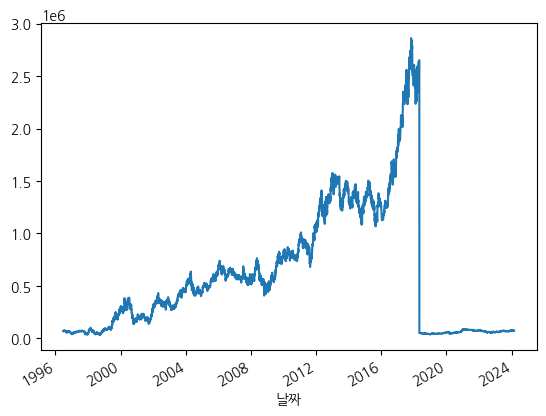

In [29]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
samsung['종가'].plot()

### 1일 종가 회귀예측

In [30]:
X = []
y = []

for n in range(len(samsung)-1):
    # 문제집
    a = samsung.iloc[n].to_numpy()
    # 정답지
    b = samsung.iloc[n+1]['종가']
    
    X.append(a)
    y.append(b)

In [31]:
# 원래 데이터를 split 해서 사용해야하는데
# 일단 그냥 진행했음!
import numpy as np

X = np.array(X)
y = np.array(y)

In [32]:
# 정답지가 가격이기 때문에 회귀모델!
from sklearn.ensemble import RandomForestRegressor

# 데이터가 만 개 일 경우, 첫번째 모델이 데이터 5천개로 학습
# 학습 안된 데이터로 평가하겠다는 것이 oob_score 는 True 

rf = RandomForestRegressor(oob_score=True)
rf.fit(X,y)


RandomForestRegressor(oob_score=True)

In [33]:
# Rsquare 값이 상당히 높게 나왔음
# 하지만 믿어서는 안되는 값임!
rf.oob_score_

0.9959069774197923

In [34]:
a = samsung.iloc[-1].to_numpy()

rf.predict([a])

# 머신러닝은 자기가 갖고 있는 데이터의 오차를 최대한 낮추는 방향으로 학습
# 그래서 전 날의 데이터를 가져오게 되는 것 그래서 차이가 날 수 밖에 없음
# 이틀 전의 값과 비슷함 (72800)

array([72822.])

### 10일치 데이터로 종가 회귀예측

In [35]:
# 10일치 데이터를 보면서 학습
X = []
y = []

window=10

for n in range(len(samsung)-window):
    # 현재 a의 shape은 (10,5)
    a = samsung.iloc[n:n+window].to_numpy().reshape(50)
    b = samsung.iloc[n+window]['종가']
    
    X.append(a)
    y.append(b)

X = np.array(X)
y = np.array(y)

print(X.shape, y.shape)

(6929, 50) (6929,)


In [36]:
# 정답지가 가격이기 때문에 회귀모델!
from sklearn.ensemble import RandomForestRegressor

# 데이터가 만 개 일 경우, 첫번째 모델이 데이터 5천개로 학습
# 학습 안된 데이터로 평가하겠다는 것이 oob_score 는 True 

rf = RandomForestRegressor(oob_score=True)
rf.fit(X,y)

print(rf.oob_score_)

a = samsung.iloc[-10:].to_numpy().reshape(50)
rf.predict([a])

0.9964202592204713


array([72920.])

### 1일 종가 분류 예측

In [37]:
# 20일치 이동평균선
samsung["MA20"] = samsung['종가'].rolling(window=20).mean()
samsung

,종가,시가,고가,저가,거래량,MA20
날짜,,,,,,
1996-06-26,67700.0,67600.0,67900.0,66000.0,136630.0,NaN
1996-06-27,66900.0,67500.0,67700.0,66700.0,155450.0,NaN
1996-06-28,68100.0,67300.0,68500.0,67200.0,138430.0,NaN
1996-06-29,68500.0,68100.0,69100.0,67100.0,96710.0,NaN
1996-07-01,72000.0,69000.0,72300.0,68800.0,147310.0,NaN
...,...,...,...,...,...,...
2024-02-21,73000.0,73400.0,73700.0,72900.0,11503495.0,73990.0
2024-02-22,73100.0,73800.0,73900.0,72700.0,15208934.0,73885.0
2024-02-23,72900.0,73600.0,74200.0,72900.0,16225166.0,73830.0


In [38]:
samsung = samsung.dropna()
samsung

,종가,시가,고가,저가,거래량,MA20
날짜,,,,,,
1996-07-19,74200.0,70000.0,74200.0,70000.0,179810.0,70200.0
1996-07-20,76700.0,75700.0,78600.0,74200.0,298780.0,70650.0
1996-07-22,75000.0,76100.0,77400.0,75000.0,178690.0,71055.0
1996-07-23,74700.0,75000.0,75200.0,73600.0,89150.0,71385.0
1996-07-24,72500.0,74800.0,75500.0,72500.0,91300.0,71585.0
...,...,...,...,...,...,...
2024-02-21,73000.0,73400.0,73700.0,72900.0,11503495.0,73990.0
2024-02-22,73100.0,73800.0,73900.0,72700.0,15208934.0,73885.0
2024-02-23,72900.0,73600.0,74200.0,72900.0,16225166.0,73830.0


In [78]:
from sklearn.ensemble import RandomForestClassifier

X=[]
y=[]

for n in range(len(samsung)-1):
    # RSI, 가중이동평균, 볼린저밴드 를 넣을 때 좀 좋았음!
    # 검색해서 종가 데이터를 만들 수 있으니 만들어서 사용해봐랑
    a = samsung.iloc[n].to_numpy()
    
    # 그 날 가격보다 2퍼센트 오른 가격이 다음날 가격보다 크다면 (다음날이 2퍼센트 오른다면)
    # 1과 0을 넣음
    b = int(samsung.iloc[n]['종가']*1.02 < samsung.iloc[n+1]['종가']) #참1 거짓0
    
    X.append(a)
    y.append(b)

In [79]:
np.unique(y, return_counts=True)

(array([0, 1]), array([5842, 1077], dtype=int64))

In [80]:
X = np.array(X)
y = np.array(y)

In [81]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

train_x, test_x, train_y, test_y = train_test_split(X,y)

smote = SMOTE()
train_x2, train_y2 = smote.fit_resample(train_x, train_y)

print(np.unique(train_y2, return_counts=True))

rf = RandomForestClassifier()
rf.fit(train_x2, train_y2)

(array([0, 1]), array([4376, 4376], dtype=int64))


RandomForestClassifier()

In [82]:
# 왜 precision : 틀리는건 잘 맞춰봐야 소용없어. 정확도가 90이어도
# recall은 잡아내는 거니까 컴퓨터가 예측한거 중에서 실제 오른게 의미가 있는거
# 그냥 다 오른다고 예측하면 1인데, 반은 틀린거니까
report = classification_report(test_y, rf.predict(test_x))
print(report)

              precision    recall  f1-score   support

           0       0.87      0.77      0.81      1466
           1       0.21      0.33      0.26       264

    accuracy                           0.70      1730
   macro avg       0.54      0.55      0.54      1730
weighted avg       0.76      0.70      0.73      1730



In [83]:
# 0.97은 0일 확률 
# 0.03은 1일 확률 
# 오르지 않을거다라고 보는것
a = samsung.iloc[-1].to_numpy()
rf.predict_proba([a])

array([[1., 0.]])

## FinanceDataReader

크롤링 라이브러리   

In [67]:
import FinanceDataReader as fdr

korea = fdr.StockListing("KRX")
korea

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72500,2,-700,-0.96,72600,72900,72000,5567159,403040778600,432809234875000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,155800,2,-2200,-1.39,154900,156800,154500,1006395,156508891000,113422768467000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,396500,2,-4000,-1.00,399000,399500,394000,41545,16459720000,92781000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,775000,2,-26000,-3.25,796000,801000,772000,49220,38340661000,55159850000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,,247000,2,-1000,-0.40,246500,249000,243500,495697,122315123000,52248281982000,211531506,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,217320,KR7217320001,썬테크,KONEX,일반기업부,2900,0,0,0.00,0,0,0,0,0,3045000000,1050000,KNX
2793,288490,KR7288490006,나라소프트,KONEX,일반기업부,49,3,0,0.00,50,50,46,2567,121255,2568321868,52414732,KNX
2794,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1399,0,0,0.00,0,0,0,0,0,2210364040,1579960,KNX
2795,308700,KR7308700004,테크엔,KONEX,일반기업부,460,4,60,15.00,460,460,460,1,460,1840000000,4000000,KNX


In [70]:
korea_dic = {}

for i in range(len(korea[:10])):
    data = korea.iloc[i]
    
    code = data['Code']
    name = data['Name']
    
    print(code, name)
    
    df = fdr.DataReader("Naver : "+code)
    korea_dic[name]=df

005930 삼성전자
000660 SK하이닉스
373220 LG에너지솔루션
207940 삼성바이오로직스
005380 현대차
005935 삼성전자우
000270 기아
068270 셀트리온
005490 POSCO홀딩스
051910 LG화학


In [71]:
korea_dic['삼성전자']

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-11-09,4220,4460,4170,4430,947061,NaN
1999-11-10,4400,4420,4300,4320,707761,-0.024831
1999-11-11,4390,4480,4320,4330,747622,0.002315
1999-11-12,4440,4750,4420,4600,1189695,0.062356
1999-11-15,4800,4800,4510,4540,687524,-0.013043
...,...,...,...,...,...,...
2024-02-23,73600,74200,72900,72900,16225166,-0.002736
2024-02-26,72300,73200,72200,72800,14669352,-0.001372
2024-02-27,73100,73400,72700,72900,13201981,0.001374


### 100개 종목 중에서 오늘(2월 29일) 오르는 종목들만 추출하기

In [104]:
korea_dic = {}

for i in range(len(korea[:100])):
    data = korea.iloc[i]
    
    code = data['Code']
    name = data['Name']
    
    print(code, name)
    
    df = fdr.DataReader("Naver : "+code)
    korea_dic[name]=df

005930 삼성전자
000660 SK하이닉스
373220 LG에너지솔루션
207940 삼성바이오로직스
005380 현대차
005935 삼성전자우
000270 기아
068270 셀트리온
005490 POSCO홀딩스
051910 LG화학
035420 NAVER
028260 삼성물산
006400 삼성SDI
105560 KB금융
247540 에코프로비엠
035720 카카오
003670 포스코퓨처엠
012330 현대모비스
055550 신한지주
032830 삼성생명
138040 메리츠금융지주
086790 하나금융지주
086520 에코프로
015760 한국전력
066570 LG전자
003550 LG
034730 SK
323410 카카오뱅크
000810 삼성화재
450080 에코프로머티
011200 HMM
033780 KT&G
018260 삼성에스디에스
096770 SK이노베이션
017670 SK텔레콤
024110 기업은행
316140 우리금융지주
259960 크래프톤
329180 HD현대중공업
009150 삼성전기
034020 두산에너빌리티
028300 HLB
030200 KT
047050 포스코인터내셔널
012450 한화에어로스페이스
010130 고려아연
402340 SK스퀘어
196170 알테오젠
010950 S-Oil
042700 한미반도체
352820 하이브
003490 대한항공
022100 포스코DX
009540 HD한국조선해양
042660 한화오션
326030 SK바이오팜
086280 현대글로비스
090430 아모레퍼시픽
010140 삼성중공업
005830 DB손해보험
161390 한국타이어앤테크놀로지
377300 카카오페이
066970 엘앤에프
005070 코스모신소재
005387 현대차2우B
001570 금양
267250 HD현대
088980 맥쿼리인프라
000100 유한양행
006800 미래에셋증권
011170 롯데케미칼
251270 넷마블
361610 SK아이이테크놀로지
051900 LG생활건강
047810 한국항공우주
348370 엔켐
028050 삼

In [76]:
korea_dic.keys()

dict_keys(['삼성전자', 'SK하이닉스', 'LG에너지솔루션', '삼성바이오로직스', '현대차', '삼성전자우', '기아', '셀트리온', 'POSCO홀딩스', 'LG화학', 'NAVER', '삼성물산', '삼성SDI', 'KB금융', '에코프로비엠', '카카오', '포스코퓨처엠', '현대모비스', '신한지주', '삼성생명', '메리츠금융지주', '하나금융지주', '에코프로', '한국전력', 'LG전자', 'LG', 'SK', '카카오뱅크', '삼성화재', '에코프로머티', 'HMM', 'KT&G', '삼성에스디에스', 'SK이노베이션', 'SK텔레콤', '기업은행', '우리금융지주', '크래프톤', 'HD현대중공업', '삼성전기', '두산에너빌리티', 'HLB', 'KT', '포스코인터내셔널', '한화에어로스페이스', '고려아연', 'SK스퀘어', '알테오젠', 'S-Oil', '한미반도체', '하이브', '대한항공', '포스코DX', 'HD한국조선해양', '한화오션', 'SK바이오팜', '현대글로비스', '아모레퍼시픽', '삼성중공업', 'DB손해보험', '한국타이어앤테크놀로지', '카카오페이', '엘앤에프', '코스모신소재', '현대차2우B', '금양', 'HD현대', '맥쿼리인프라', '유한양행', '미래에셋증권', '롯데케미칼', '넷마블', 'SK아이이테크놀로지', 'LG생활건강', '한국항공우주', '엔켐', '삼성엔지니어링', 'LG이노텍', '두산로보틱스', '한화솔루션', '현대제철', 'SK바이오사이언스', '두산밥캣', 'HD현대일렉트릭', '셀트리온제약', 'LG유플러스', 'GS', 'CJ제일제당', '삼성카드', '금호석유', '한미약품', '한진칼', 'HPSP', '엔씨소프트', '현대오토에버', '코웨이', 'LG디스플레이', '한국금융지주', 'NH투자증권', '현대건설'])

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
ans = []
for i in korea_dic.keys():
    stockdf = korea_dic[i].copy()
    stockdf = stockdf[:-1]
    stockdf = stockdf.dropna()

    X=[]
    y=[]

    for n in range(len(stockdf)-1):
        # RSI, 가중이동평균, 볼린저밴드 를 넣을 때 좀 좋았음!
        # 검색해서 종가 데이터를 만들 수 있으니 만들어서 사용해봐랑
        a = stockdf.iloc[n].to_numpy()

        # 그 날 가격보다 2퍼센트 오른 가격이 다음날 가격보다 크다면 (다음날이 2퍼센트 오른다면)
        # 1과 0을 넣음
        b = int(stockdf.iloc[n]['Close']*1.02 < stockdf.iloc[n+1]['Close']) #참1 거짓0

        X.append(a)
        y.append(b)

    X = np.array(X)
    y = np.array(y)


    train_x, test_x, train_y, test_y = train_test_split(X,y)

    smote = SMOTE()
    train_x2, train_y2 = smote.fit_resample(train_x, train_y)

    rf = RandomForestClassifier()
    rf.fit(train_x2, train_y2)

    report = classification_report(test_y, rf.predict(test_x))

    # 0.97은 0일 확률 
    # 0.03은 1일 확률 
    # 오르지 않을거다라고 보는것
    a = stockdf.iloc[-1].to_numpy()
    b = rf.predict_proba([a])
    
    if b[0][0]<b[0][1]:
        ans.append(i)

In [94]:
print(ans)

['삼성바이오로직스', '셀트리온', 'LG화학', '에코프로비엠', '포스코퓨처엠', '삼성생명', '에코프로', '한국전력', 'SK', '삼성화재', 'HMM', 'KT&G', '삼성에스디에스', '한화에어로스페이스', 'SK스퀘어', '알테오젠', '한미반도체', '하이브', 'HD한국조선해양', '한화오션', 'DB손해보험', '현대차2우B', '금양', '엔켐', 'LG디스플레이']


### 100개 종목 중에서 오늘(2월 29일) 오르는 종목과 임계값이 0.8이상

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score

ans2 = []
for i in korea_dic.keys():
    stockdf = korea_dic[i].copy()
    stockdf = stockdf[:-1].dropna()

    X=[]
    y=[]

    for n in range(len(stockdf)-1):
        
        a = stockdf.iloc[n].to_numpy()
        b = int(stockdf.iloc[n]['Close'] < stockdf.iloc[n+1]['Close']) #참1 거짓0

        X.append(a)
        y.append(b)

    X = np.array(X)
    y = np.array(y)


    train_x, test_x, train_y, test_y = train_test_split(X,y)

    smote = SMOTE()
    train_x2, train_y2 = smote.fit_resample(train_x, train_y)

    rf = RandomForestClassifier()
    rf.fit(train_x2, train_y2)

    precision = precision_score(test_y,rf.predict(test_x))
    
    pred = rf.predict_proba([stockdf.iloc[-1]])[0][1]
    
    if pred>=0.8:
        print(i, pred, precision)
        ans2.append(i)

기아 0.82 0.4659248956884562
한화에어로스페이스 0.93 0.49025069637883006
대한항공 0.81 0.47368421052631576
SK바이오팜 0.88 0.4322033898305085
금양 0.83 0.4463276836158192


In [99]:
ans2

['하이브']

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

ans3 = []
smote=SMOTE()

X=[]
y=[]

for i in korea_dic.keys():
    stockdf = korea_dic[i].copy()
    stockdf = stockdf[:-1].dropna()

    for n in range(len(stockdf)-1):
        
        a = stockdf.iloc[n].to_numpy()
        b = int(stockdf.iloc[n]['Close']< stockdf.iloc[n+1]['Close']) #참1 거짓0

        X.append(a)
        y.append(b)

In [107]:
X = np.array(X)
y = np.array(y)


train_x, test_x, train_y, test_y = train_test_split(X,y)

train_x2, train_y2 = smote.fit_resample(train_x, train_y)

rf = RandomForestClassifier()
rf.fit(train_x2, train_y2)

RandomForestClassifier()

In [109]:
report = classification_report(test_y, rf.predict(test_x))
print(report)

              precision    recall  f1-score   support

           0       0.54      0.54      0.54     57054
           1       0.47      0.47      0.47     49362

    accuracy                           0.51    106416
   macro avg       0.50      0.50      0.50    106416
weighted avg       0.51      0.51      0.51    106416



#### 오늘 날짜 기준 2퍼센트 증가시켰을 때

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

ans3 = []
smote=SMOTE()

X=[]
y=[]

for i in korea_dic.keys():
    stockdf = korea_dic[i].copy()
    stockdf = stockdf[:-1].dropna()

    for n in range(len(stockdf)-1):
        
        a = stockdf.iloc[n].to_numpy()
        b = int(stockdf.iloc[n]['Close']*1.02 < stockdf.iloc[n+1]['Close']) #참1 거짓0

        X.append(a)
        y.append(b)
        
        
X = np.array(X)
y = np.array(y)


train_x, test_x, train_y, test_y = train_test_split(X,y)

train_x2, train_y2 = smote.fit_resample(train_x, train_y)

rf = RandomForestClassifier()
rf.fit(train_x2, train_y2)

RandomForestClassifier()

In [111]:
report = classification_report(test_y, rf.predict(test_x))
print(report)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80     87938
           1       0.22      0.31      0.26     18478

    accuracy                           0.68    106416
   macro avg       0.53      0.54      0.53    106416
weighted avg       0.73      0.68      0.70    106416



In [114]:
for i in korea_dic:
    # 오늘 날짜(27일)
    data = korea_dic[i].copy().iloc[-1].to_numpy()
    
    pred= rf.predict_proba([data])[0][1]
    print(i, pred)
    
    # 삼성전자가 2퍼센트 오를 확률이 25퍼센트이다 근데 이걸 22퍼센트 믿어야한다

삼성전자 0.25
SK하이닉스 0.6
LG에너지솔루션 0.06
삼성바이오로직스 0.27
현대차 0.31
삼성전자우 0.19
기아 0.46
셀트리온 0.39
POSCO홀딩스 0.14
LG화학 0.26
NAVER 0.48
삼성물산 0.74
삼성SDI 0.06
KB금융 0.34
에코프로비엠 0.23
카카오 0.27
포스코퓨처엠 0.38
현대모비스 0.37
신한지주 0.17
삼성생명 0.55
메리츠금융지주 0.54
하나금융지주 0.58
에코프로 0.19
한국전력 0.37
LG전자 0.06
LG 0.23
SK 0.18
카카오뱅크 0.25
삼성화재 0.15
에코프로머티 0.54
HMM 0.2
KT&G 0.16
삼성에스디에스 0.47
SK이노베이션 0.57
SK텔레콤 0.46
기업은행 0.35
우리금융지주 0.33
크래프톤 0.38
HD현대중공업 0.76
삼성전기 0.14
두산에너빌리티 0.65
HLB 0.47
KT 0.35
포스코인터내셔널 0.4
한화에어로스페이스 0.75
고려아연 0.25
SK스퀘어 0.44
알테오젠 0.4
S-Oil 0.26
한미반도체 0.24
하이브 0.18
대한항공 0.19
포스코DX 0.38
HD한국조선해양 0.58
한화오션 0.36
SK바이오팜 0.16
현대글로비스 0.3
아모레퍼시픽 0.67
삼성중공업 0.45
DB손해보험 0.32
한국타이어앤테크놀로지 0.55
카카오페이 0.07
엘앤에프 0.21
코스모신소재 0.6
현대차2우B 0.24
금양 0.16
HD현대 0.52
맥쿼리인프라 0.4
유한양행 0.18
미래에셋증권 0.39
롯데케미칼 0.67
넷마블 0.46
SK아이이테크놀로지 0.42
LG생활건강 0.37
한국항공우주 0.42
엔켐 0.63
삼성엔지니어링 0.79
LG이노텍 0.17
두산로보틱스 0.23
한화솔루션 0.23
현대제철 0.51
SK바이오사이언스 0.55
두산밥캣 0.36
HD현대일렉트릭 0.46
셀트리온제약 0.69
LG유플러스 0.65
GS 0.12
CJ제일제당 0.14
삼성카드 0.27
금호석유 0.75
한미약품 0.